# 1. Visualization 1: Bar Chart of Winning Parties by State

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('MALAYSIA_PRN6_2023_ELECTION_RESULTS.csv')

In [2]:
winning_counts = data.groupby(['STATE', 'WINNING PARTY']).size().unstack()

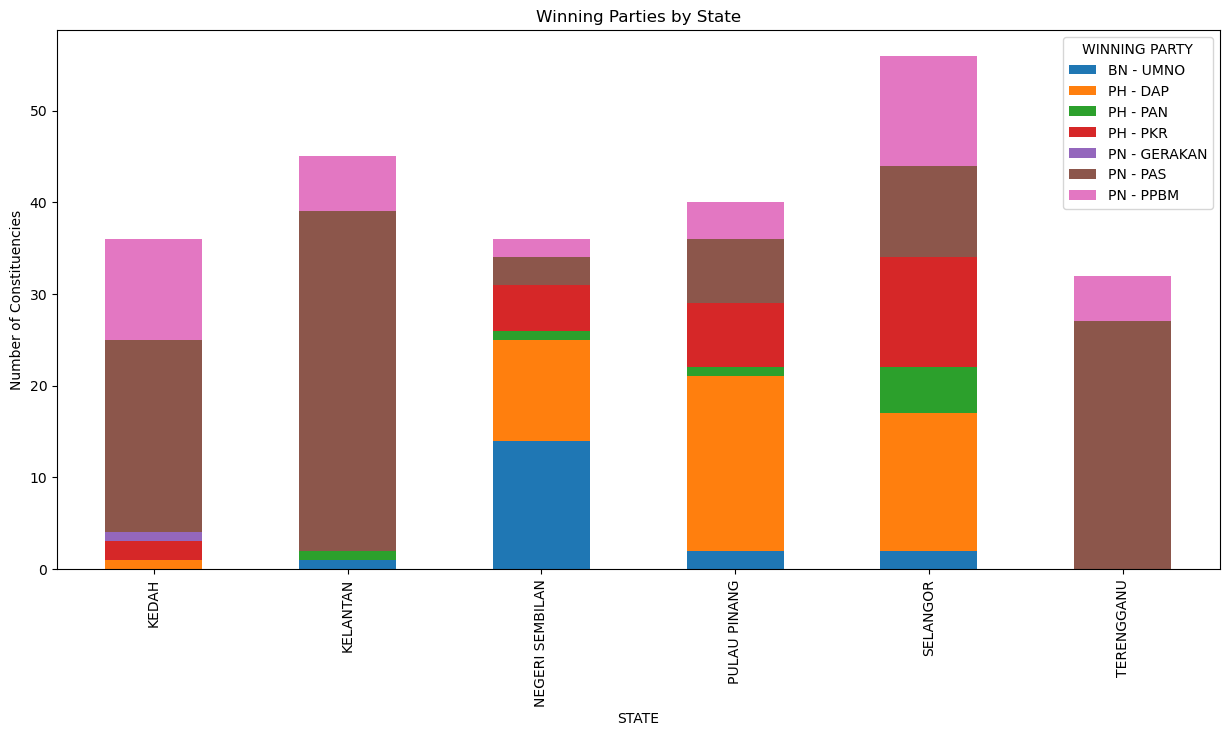

In [3]:
winning_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Winning Parties by State")
plt.ylabel("Number of Constituencies")
plt.show()

# 2. Visualization 2: Pie Chart of the Distribution of Winning Parties Across Malaysia

In [4]:
party_counts = data['WINNING PARTY'].value_counts()

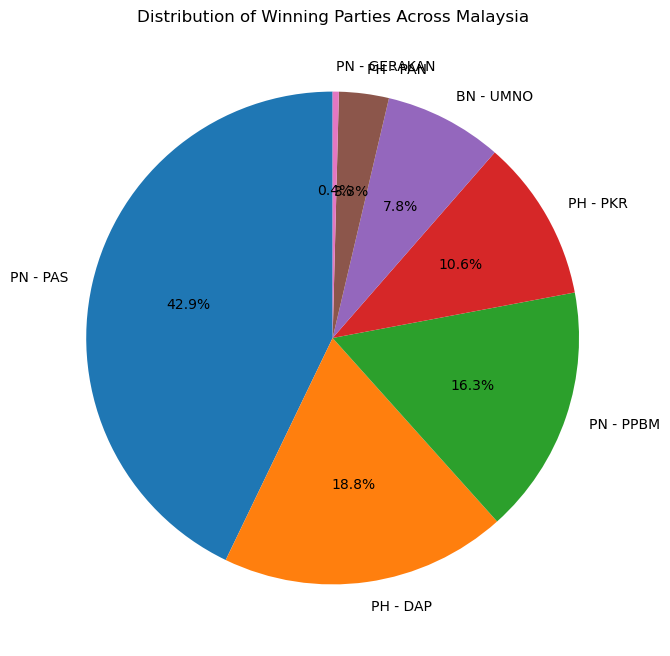

In [6]:
party_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 8))
plt.title("Distribution of Winning Parties Across Malaysia")
plt.ylabel("")
plt.show()

In [7]:
data.columns

Index(['UNIQUE CODE', 'STATE', 'PARLIAMENTARY CODE', 'PARLIAMENTARY NAME',
       'STATE CONSTITUENCY CODE', 'STATE CONSTITUENCY NAME', 'WINNING PARTY',
       'UNCONTESTED VICTORY', 'TOTAL ELECTORATE', 'WINNING MAJORITY',
       'TURNOUT (%)', 'TOTAL BALLOTS ISSUED', 'TOTAL UNRETURNED VOTES',
       'TOTAL REJECTED VOTES', 'TOTAL VALID VOTES', 'BN', 'BN CANDIDATE',
       'BN CANDIDATE GENDER', 'BN CANDIDATE AGE', 'BN VOTE',
       'BN CANDIDATE LOST DEPOSIT', 'PH', 'PH CANDIDATE',
       'PH CANDIDATE GENDER', 'PH CANDIDATE AGE', 'PH VOTE',
       'PH CANDIDATE LOST DEPOSIT', 'PN', 'PN CANDIDATE',
       'PN CANDIDATE GENDER', 'PN CANDIDATE AGE', 'PN VOTE',
       'PN CANDIDATE LOST DEPOSIT', 'OTHER PARTY (1)',
       'OTHER PARTY (1) CANDIDATE', 'OTHER PARTY (1) CANDIDATE GENDER',
       'OTHER PARTY (1) CANDIDATE AGE', 'OTHER PARTY (1) VOTE',
       'OTHER PARTY (1) CANDIDATE LOST DEPOSIT', 'OTHER PARTY (2)',
       'OTHER PARTY (2) CANDIDATE', 'OTHER PARTY (2) CANDIDATE GENDER',
 

# 3. Visualization 3: Histogram of the Age Distribution of Candidates

In [8]:
age_columns = [col for col in data.columns if "CANDIDATE AGE" in col]

In [9]:
# Concatenate these columns into a single series
all_ages = pd.concat([data[col] for col in age_columns]).dropna()

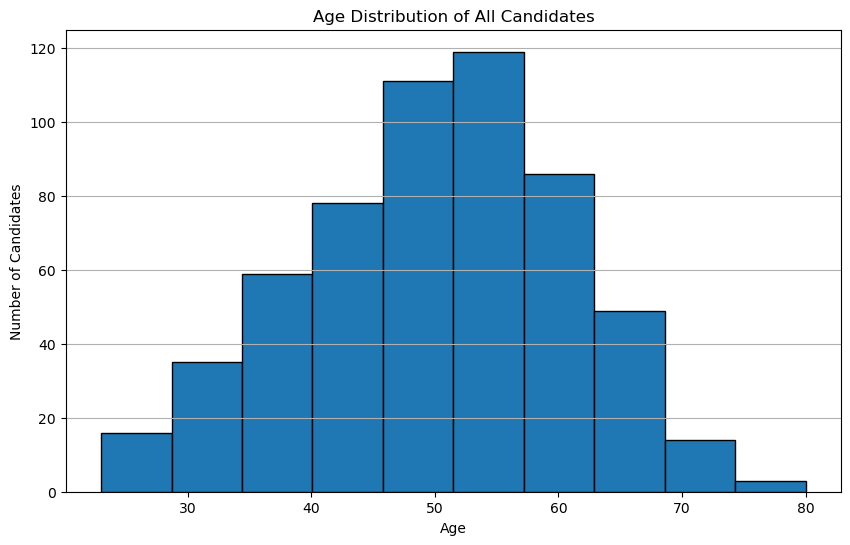

In [10]:
# Plot a histogram using the consolidated age data
plt.figure(figsize=(10, 6))
plt.hist(all_ages, bins=10, edgecolor='black', alpha=1)
plt.title("Age Distribution of All Candidates")
plt.xlabel("Age")
plt.ylabel("Number of Candidates")
plt.grid(axis='y')
#plt.tight_layout()
plt.show()

# 4. Visualization 4: Bar Chart of Total Electorates by State

In [11]:
electorates = data.groupby('STATE')['TOTAL ELECTORATE'].sum()

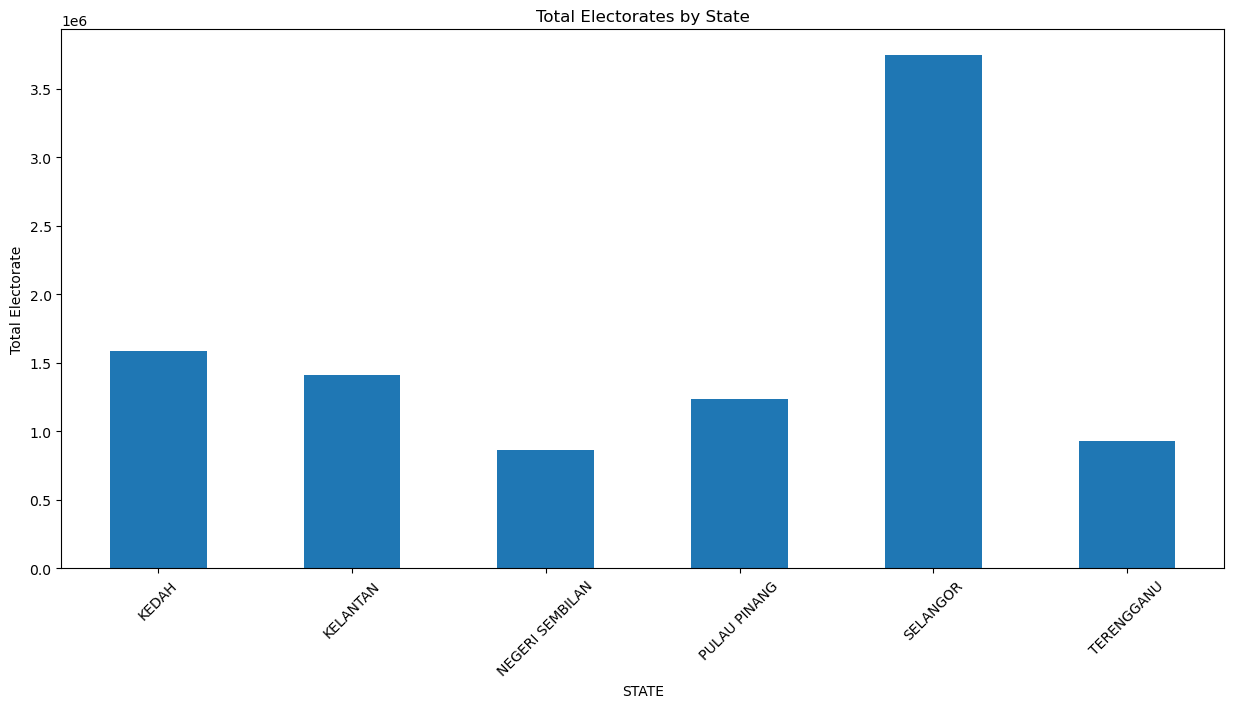

In [12]:
electorates.plot(kind='bar', figsize=(15, 7))
plt.xticks(rotation=45)
plt.title("Total Electorates by State")
plt.ylabel("Total Electorate")
plt.show()

# 5. Visualization 5: Bar Chart of Winning Majority by State

In [13]:
# Group by state and sum the winning majority
winning_majority_by_state = data.groupby('STATE')['WINNING MAJORITY'].sum().sort_values(ascending=False)

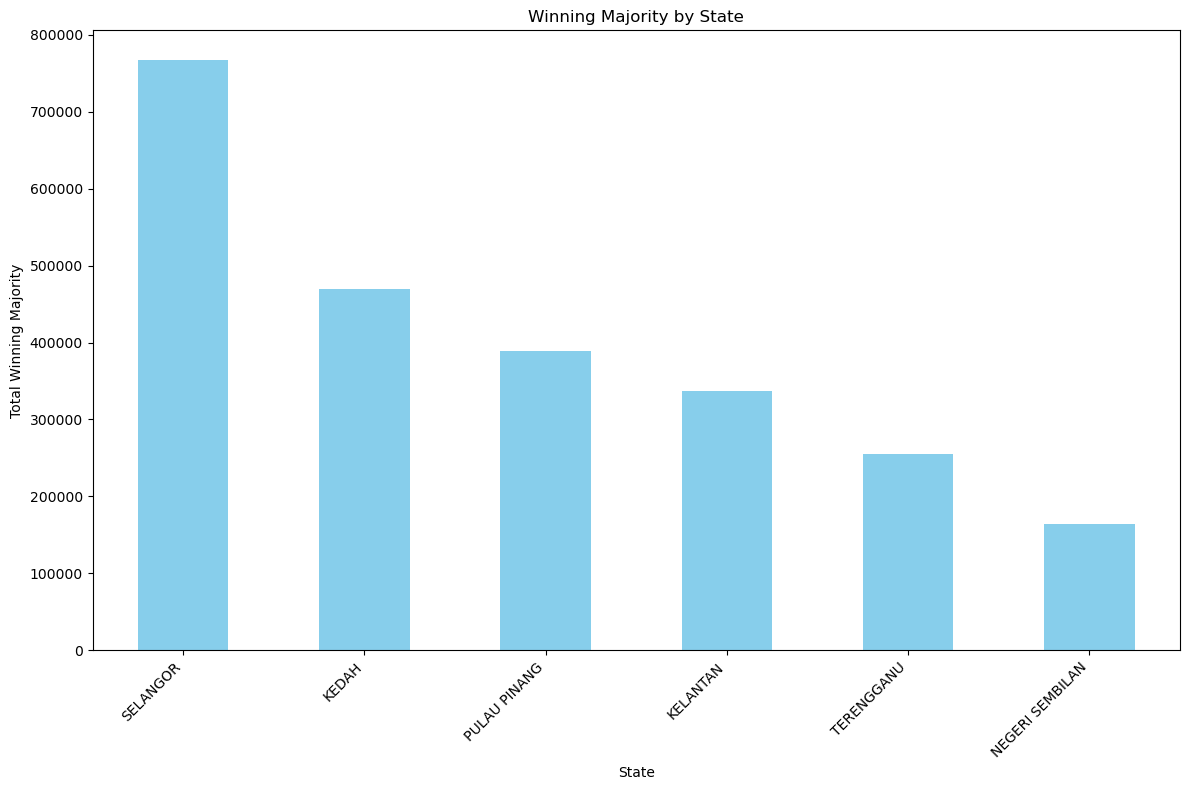

In [14]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the data
winning_majority_by_state.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Winning Majority by State')
plt.xlabel('State')
plt.ylabel('Total Winning Majority')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

# 6. Visualization 6: Box Plot of Candidate Ages by Party

In [15]:
# Extract age columns for each party's candidates
age_columns = [col for col in data.columns if 'CANDIDATE AGE' in col and 'INDEPENDENT' not in col]
party_names_age = [col.split(' ')[0] for col in age_columns]

# Combining all age data into one DataFrame for easier plotting
age_df = pd.concat([data[col].dropna() for col in age_columns], axis=1)
age_df.columns = party_names_age

In [16]:
# Reshaping the data to long format
age_df_melted = age_df.melt(value_name="Age", var_name="Party")

C:\Users\ailfa\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ailfa\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ailfa\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


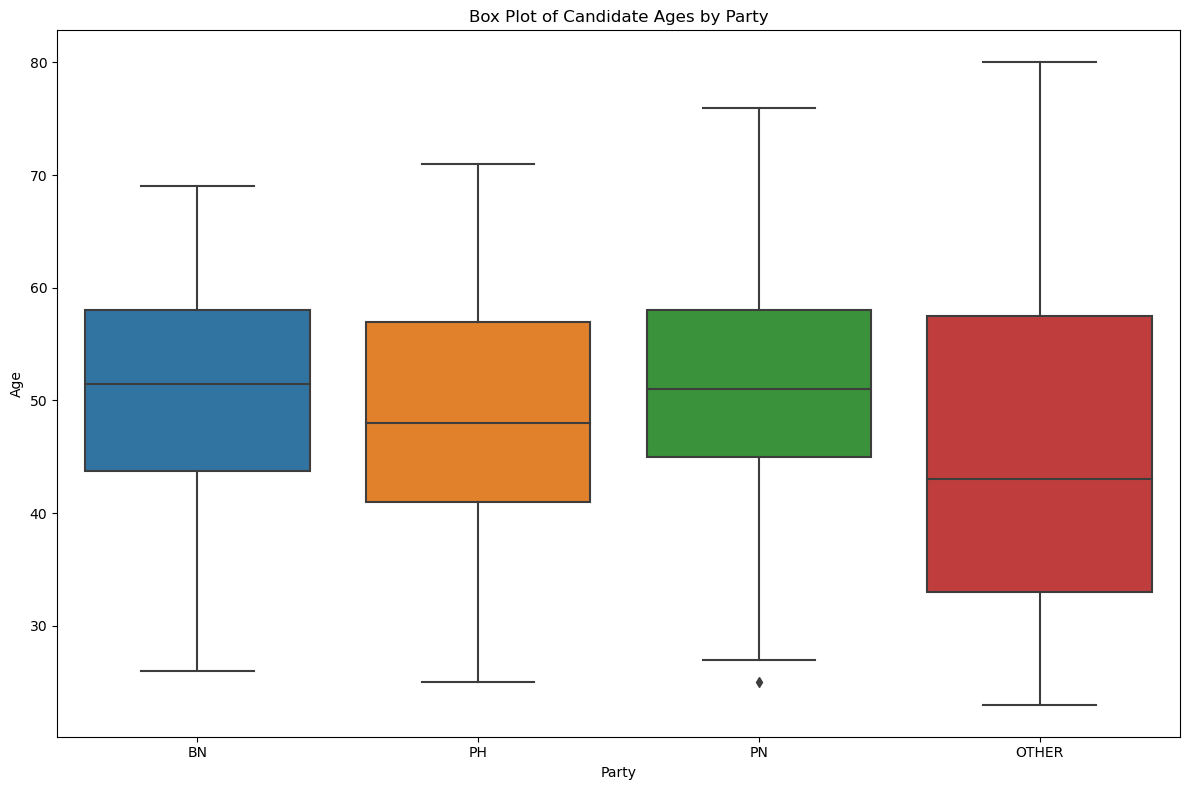

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Party", y="Age", data=age_df_melted)
plt.title('Box Plot of Candidate Ages by Party')
plt.ylabel('Age')
plt.xlabel('Party')
plt.tight_layout()
plt.show()

# 7.1 Exercise

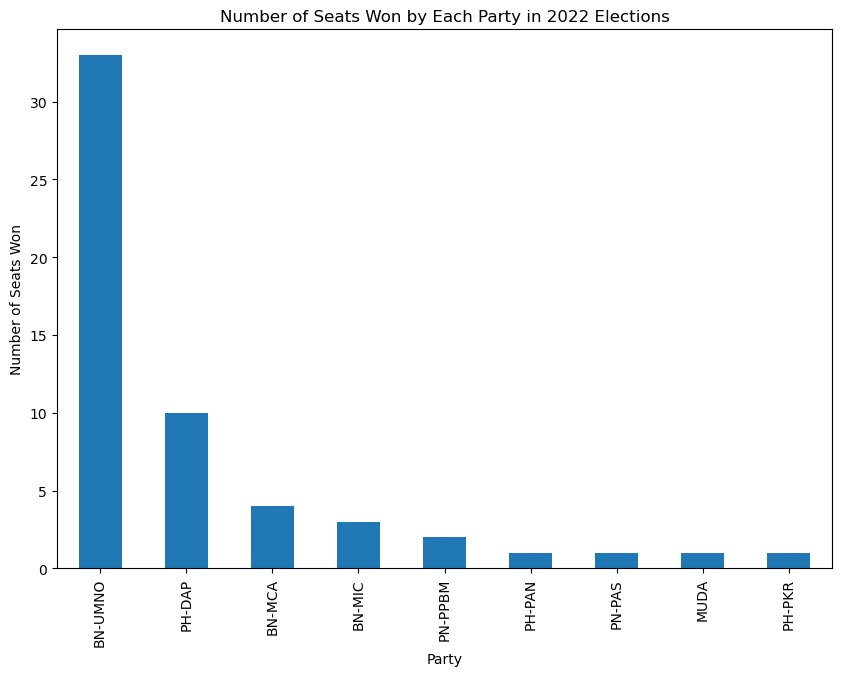

In [21]:
johor_election_data = pd.read_csv('JOHOR_2022_ELECTION_RESULTS.csv')

party_counts = johor_election_data['WINNING PARTY (2022)'].value_counts()

plt.figure(figsize=(10,7))
party_counts.plot(kind='bar')
plt.title('Number of Seats Won by Each Party in 2022 Elections')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.show()

# 7.2 Exercise

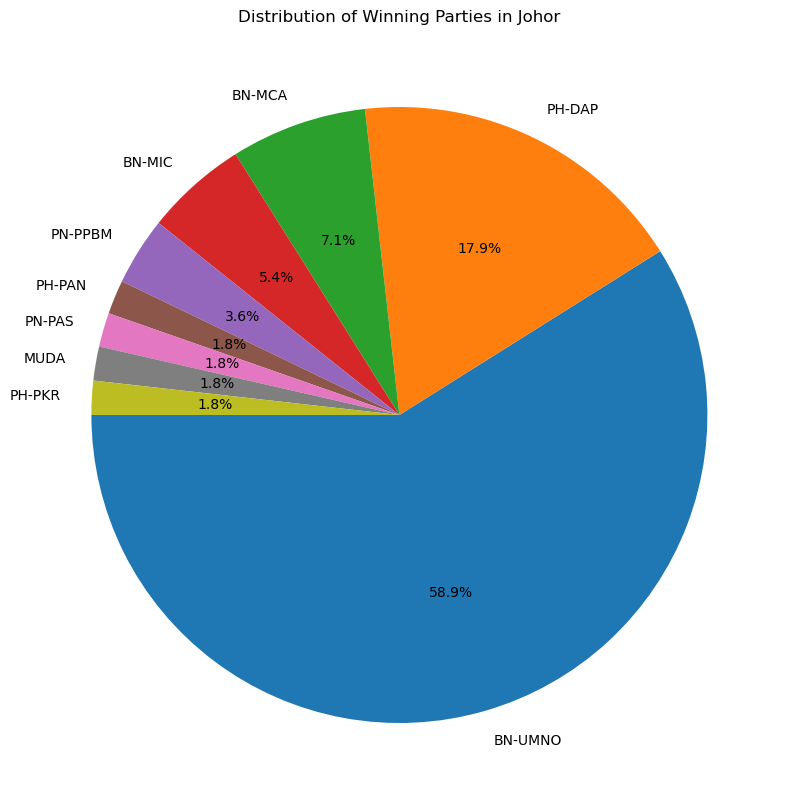

In [22]:
#plt.figure(figsize=(10,7))
#party_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0'])
#plt.title('Distribution of Seats Won by Top 5 Parties in 2022 Elections')
#plt.ylabel('')  # Remove y-axis label for better presentation
#plt.show()

party_counts.plot.pie(autopct='%1.1f%%', startangle=180, figsize=(10, 10))
plt.title("Distribution of Winning Parties in Johor")
plt.ylabel("")
plt.show()

# 7.3 Exercise

In [23]:
electorates = johor_election_data.groupby('PARLIAMENTARY NAME')['TOTAL ELECTORATE'].sum()

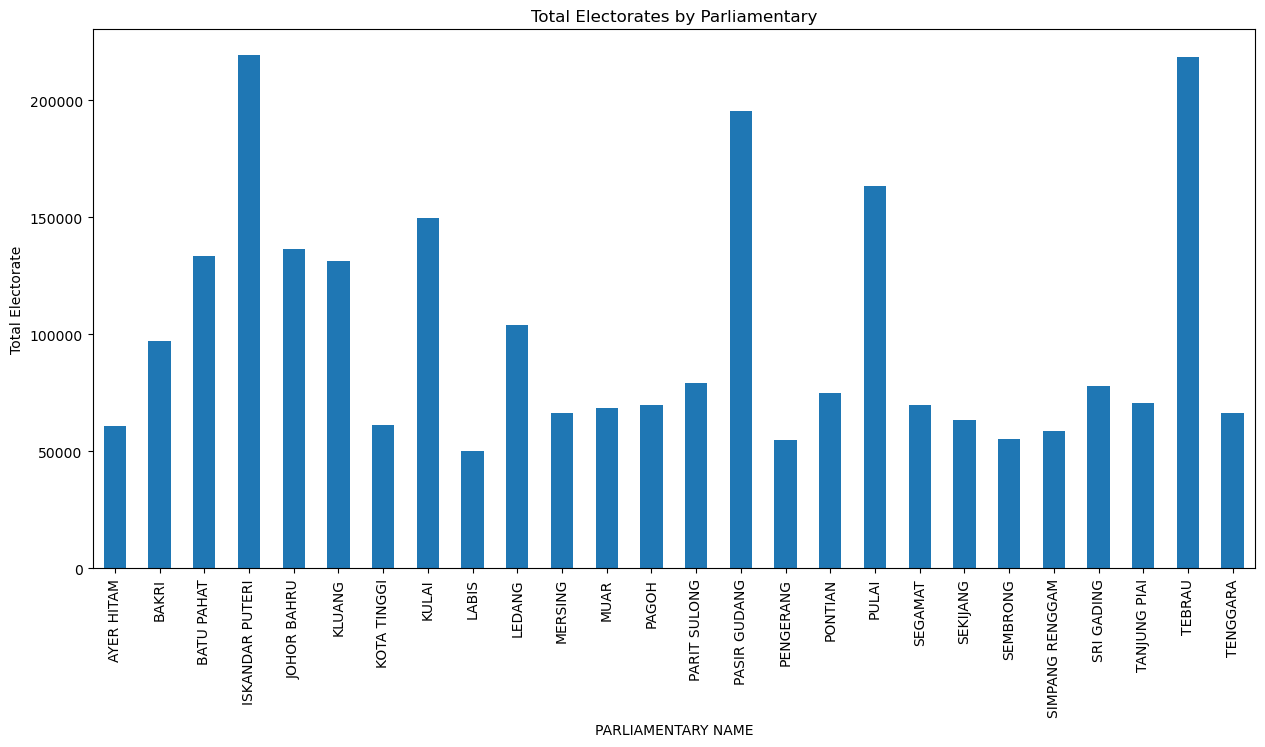

In [24]:
electorates.plot(kind='bar', figsize=(15, 7))
plt.title("Total Electorates by Parliamentary")
plt.ylabel("Total Electorate")
plt.show()

In [25]:
age_bn = johor_election_data['BN CANDIDATE AGE']
print(age_bn)

0     55.0
1     31.0
2     46.0
3     58.0
4     48.0
5     47.0
6     51.0
7     35.0
8     44.0
9     32.0
10    57.0
11    39.0
12    60.0
13    53.0
14    36.0
15    56.0
16    42.0
17    50.0
18    38.0
19    62.0
20    39.0
21    43.0
22     NaN
23    54.0
24    65.0
25    42.0
26     NaN
27    26.0
28    61.0
29    31.0
30    49.0
31    48.0
32    40.0
33     NaN
34     NaN
35     NaN
36    38.0
37    45.0
38    37.0
39    43.0
40    58.0
41     NaN
42     NaN
43    37.0
44    57.0
45     NaN
46    50.0
47     NaN
48    58.0
49     NaN
50    57.0
51    45.0
52    63.0
53    45.0
54    60.0
55    54.0
Name: BN CANDIDATE AGE, dtype: float64


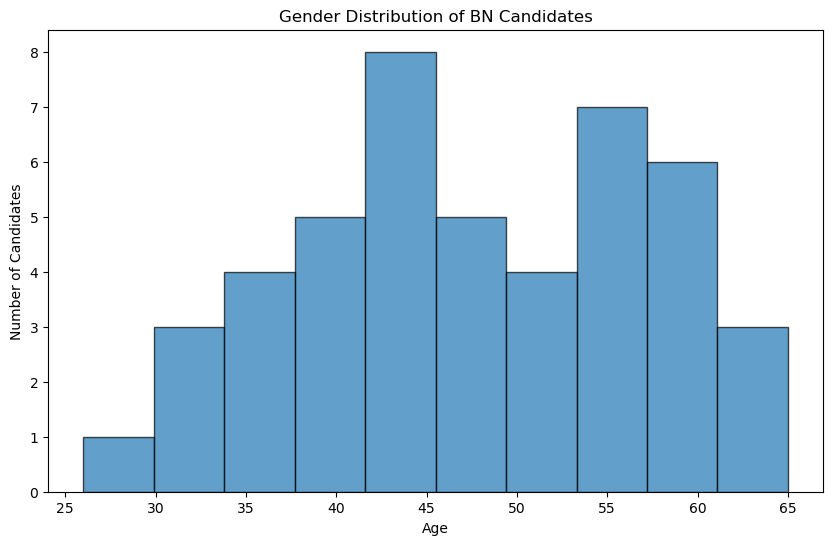

In [26]:
# Plot a histogram using the consolidated age data
plt.figure(figsize=(10, 6))
plt.hist(age_bn, bins=10, edgecolor='black', alpha=0.7)
plt.title("Gender Distribution of BN Candidates")
plt.xlabel("Age")
plt.ylabel("Number of Candidates")
#plt.grid(axis='y')
#plt.tight_layout()
plt.show()